# bibliotecas

In [1]:
import numpy as np
import sympy as sy
from sympy import *
import matplotlib.pyplot as plt

# funções para cálculo de zeros de f(x)=0

In [40]:
def metodo_bisseccao(fx, a, b, epsilon, MAX_ITER):
    '''
    Método da bissecção.
    
    Entrada:
        fx : função.
        a : limite inferior do intervalo de busca.
        b : limite superior do intervalo de busca.
        epsilon : tolerância.
        MAX_ITER : número máximo de iterações.
    Saída:
        xk : zero de f(x)
    '''
    f = lambdify(x, fx)
    xk_bef = 1.0e+20
    k = 1
    for k in range(MAX_ITER):
        fa = f(a)
        fb = f(b)
        assert fa*fb < 0, f'f({a})={fa} and f({b})={fb}'
        xk = (a+b)*0.5
        fxk = f(xk)
        if fxk == 0.0:
            print(f'Convergência após {k} iterações!')
            break
        if fa * fxk < 0:
            b = xk
        else:
            a = xk
        varepsilon = np.abs(xk-xk_bef) / max([1,np.abs(xk)])
        print(f'ITERAÇÃO {k}: x={xk}, f(x)={fxk}, erro = {varepsilon}')
        if varepsilon < epsilon:
            print(f'Convergência após {k} iterações!')
            break
        else:
            xk_bef = xk
        k += 1
    print(f'O programa terminou após {k} iterações!')
    return xk

def metodo_iteracao_linear(fx, psix, a, b, epsilon, MAX_ITER):
    '''
    Método da iteração linear.
    
    Entrada:
        fx : função.
        psix : função psi(x).
        a : limite inferior do intervalo de busca.
        b : limite superior do intervalo de busca.
        epsilon : tolerância.
        MAX_ITER : número máximo de iterações.
    Saída:
        xk : zero de f(x)
    '''
    f = lambdify(x, fx)
    psi = lambdify(x, psix)
    xk_bef = (a+b)*0.5
    k = 1
    for k in range(MAX_ITER):
        xk = psi(xk_bef)
        fxk = f(xk)
        varepsilon = np.abs(xk-xk_bef) / max([1,np.abs(xk)])
        print(f'ITERAÇÃO {k}: x={xk}, f(x)={fxk}, erro = {varepsilon}')
        if varepsilon < epsilon:
            print(f'Convergência após {k} iterações!')
            break
        else:
            xk_bef = xk
        k += 1
    print(f'O programa terminou após {k} iterações!')
    return xk

def metodo_newton(fx, fxd, a, b, epsilon, MAX_ITER):
    '''
    Método da iteração linear.
    
    Entrada:
        fx : função f(x).
        fxd : derivada de f(x).
        a : limite inferior do intervalo de busca.
        b : limite superior do intervalo de busca.
        epsilon : tolerância.
        MAX_ITER : número máximo de iterações.
    Saída:
        xk : zero de f(x)
    '''
    f = lambdify(x, fx)
    fd = lambdify(x, fxd)
    xk_bef = (a+b)*0.5
    k = 1
    for k in range(MAX_ITER):
        print(f(xk_bef))
        xk = xk_bef - f(xk_bef) / fd(xk_bef)
        fxk = f(xk)
        varepsilon = np.abs(xk-xk_bef) / max([1,np.abs(xk)])
        print(f'ITERAÇÃO {k}: x={xk}, f(x)={fxk}, erro = {varepsilon}')
        if varepsilon < epsilon:
            print(f'Convergência após {k} iterações!')
            break
        else:
            xk_bef = xk
        k += 1
    print(f'O programa terminou após {k} iterações!')
    return xk


# teste dos métodos

In [44]:
x = sy.Symbol("x")

In [59]:
# função
fx = (x+1)**2*sy.exp(x**2-2)-1

In [60]:
# erro e número máximo de iteração
epsilon = 1.0e-6
MAX_ITER = 30

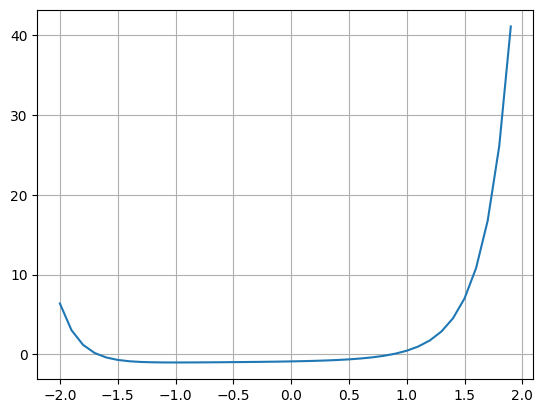

In [61]:
# verificação dos intervalos das raízes
x_np = np.arange(-2,2,0.1)
fx_np = (x_np+1)**2*np.exp(x_np**2-2)-1

plt.plot(x_np, fx_np)
plt.grid()
plt.show()

In [62]:
# raiz em (-2,-1)
a, b = (-2, -1)
xk = metodo_bisseccao(fx, a, b, epsilon, MAX_ITER)
print(f'Zero da função no intervalo [{a},{b}]: {xk}')

# raiz em (0, 1)
a, b = (0, 1)
xk = metodo_bisseccao(fx, a, b, epsilon, MAX_ITER)
print(f'Zero da função no intervalo [{a},{b}]: {xk}')

ITERAÇÃO 0: x=-1.5, f(x)=-0.6789936458280647, erro = 6.666666666666666e+19
ITERAÇÃO 1: x=-1.75, f(x)=0.6276477185966156, erro = 0.14285714285714285
ITERAÇÃO 2: x=-1.625, f(x)=-0.2587240037741724, erro = 0.07692307692307693
ITERAÇÃO 3: x=-1.6875, f(x)=0.10325990938046403, erro = 0.037037037037037035
ITERAÇÃO 4: x=-1.65625, f(x)=-0.09449535114557739, erro = 0.018867924528301886
ITERAÇÃO 5: x=-1.671875, f(x)=-0.00019989972460587868, erro = 0.009345794392523364
ITERAÇÃO 6: x=-1.6796875, f(x)=0.05033147741609256, erro = 0.004651162790697674
ITERAÇÃO 7: x=-1.67578125, f(x)=0.024772972575949126, erro = 0.002331002331002331
ITERAÇÃO 8: x=-1.673828125, f(x)=0.012214167079989569, erro = 0.0011668611435239206
ITERAÇÃO 9: x=-1.6728515625, f(x)=0.005989144623980813, erro = 0.0005837711617046118
ITERAÇÃO 10: x=-1.67236328125, f(x)=0.002890138031091949, erro = 0.00029197080291970805
ITERAÇÃO 11: x=-1.672119140625, f(x)=0.0013439996501225515, erro = 0.0001460067163089502
ITERAÇÃO 12: x=-1.671997070312

In [67]:
# raiz em (-2,-1)
a, b = (-2, -1)
psix = (sy.exp(2-2*x**2)-1)/(x+2)
xk = metodo_iteracao_linear(fx, psix, a, b, epsilon, MAX_ITER)
print(f'Zero da função no intervalo [{a},{b}]: {xk}')

# raiz em (0,1)
a, b = (0, 1)
psix = sy.exp(1-0.5*x**2)-1
xk = metodo_iteracao_linear(fx, psix, a, b, epsilon, MAX_ITER)
print(f'Zero da função no intervalo [{a},{b}]: {xk}')

ITERAÇÃO 0: x=-1.8358300027522023, f(x)=1.7500297612006595, erro = 0.18293088262461094
ITERAÇÃO 1: x=-6.038046655614521, f(x)=2.3412449193863284e+16, erro = 0.695956307153549
ITERAÇÃO 2: x=0.24764448885443033, f(x)=-0.7760108078919595, erro = 6.285691144468951
ITERAÇÃO 3: x=2.463078384226922, f(x)=698.9934142079462, erro = 0.8994573252559489
ITERAÇÃO 4: x=-0.22405169439902536, f(x)=-0.9143203204783508, erro = 2.6871300786259473
ITERAÇÃO 5: x=3.2001110649633593, f(x)=66897.56299953758, erro = 1.0700137244772754
ITERAÇÃO 6: x=-0.19230358315363713, f(x)=-0.9083847336042767, erro = 3.3924146481169966
ITERAÇÃO 7: x=3.242951916671986, f(x)=89971.16299194454, erro = 1.059298931373298
ITERAÇÃO 8: x=-0.1907322459703976, f(x)=-0.9080832594254707, erro = 3.4336841626423835
ITERAÇÃO 9: x=3.2447038468091325, f(x)=91074.77741219553, erro = 1.0587826362513686
ITERAÇÃO 10: x=-0.19066853418459967, f(x)=-0.9080710199453887, erro = 3.435372380993732
ITERAÇÃO 11: x=3.244774141615383, f(x)=91119.3514670854

In [52]:
fxd = sy.diff(fx, x)

# raiz em (-2,-1)
a, b = (-2, -1)
xk = metodo_newton(fx, fxd, a, b, epsilon, MAX_ITER)
print(f'Zero da função no intervalo [{a},{b}]: {xk}')

# raiz em (0,1)
a, b = (0, 1)
xk = metodo_newton(fx, fxd, a, b, epsilon, MAX_ITER)
print(f'Zero da função no intervalo [{a},{b}]: {xk}')

-0.6789936458280647
ITERAÇÃO 0: x=-1.8021718760408028, f(x)=1.2410818122821747, erro = 0.167670953063947
1.2410818122821747
ITERAÇÃO 1: x=-1.7113510289634712, f(x)=0.28087549622704633, erro = 0.05306967743043329
0.28087549622704633
ITERAÇÃO 2: x=-1.6761769707051446, f(x)=0.02733528163117671, erro = 0.020984692471660318
0.02733528163117671
ITERAÇÃO 3: x=-1.671960287125077, f(x)=0.0003391857432082368, erro = 0.0025219998420645596
0.0003391857432082368
ITERAÇÃO 4: x=-1.6719066391280342, f(x)=5.400113511910831e-08, erro = 3.208791435313113e-05
5.400113511910831e-08
ITERAÇÃO 5: x=-1.6719066305841153, f(x)=8.881784197001252e-16, erro = 5.110284718899811e-09
Convergência após 5 iterações!
O programa terminou após 5 iterações!
Zero da função no intervalo [-2,-1]: -1.6719066305841153
-0.6090086272364985
ITERAÇÃO 0: x=1.1675433668582345, f(x)=1.485183221943427, erro = 0.5717503827327117
1.485183221943427
ITERAÇÃO 1: x=0.9841014857374799, f(x)=0.4032459006500946, erro = 0.18344188112075455
0.4032

In [53]:
fx = sy.sin(x) + sy.ln(x+1)-1

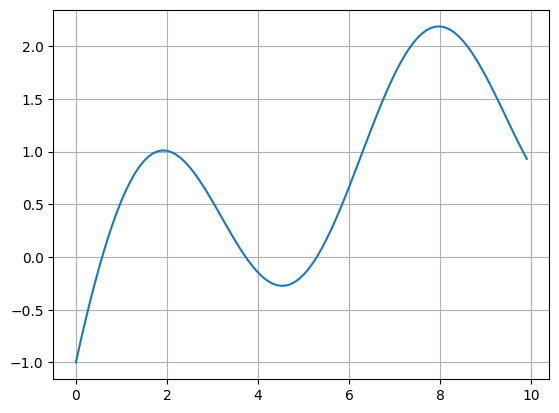

In [54]:
# verificação dos intervalos das raízes
x_np = np.arange(0,10,0.1)
fx_np = np.sin(x_np)+np.log(x_np+1)-1

plt.plot(x_np, fx_np)
plt.grid()
plt.show()

In [55]:
# intervalo [0,2]
a, b = (0,2)
xk = metodo_bisseccao(fx, a, b, epsilon, MAX_ITER)

# intervalo [2,4]
a, b = (2,4)
xk = metodo_bisseccao(fx, a, b, epsilon, MAX_ITER)

# intervalo [4,8]
a, b = (4,8)
xk = metodo_bisseccao(fx, a, b, epsilon, MAX_ITER)

ITERAÇÃO 0: x=1.0, f(x)=0.5346181653678417, erro = 1e+20
ITERAÇÃO 1: x=0.5, f(x)=-0.11510935328763261, erro = 0.5
ITERAÇÃO 2: x=0.75, f(x)=0.24125454795875667, erro = 0.25
ITERAÇÃO 3: x=0.625, f(x)=0.07060508872216298, erro = 0.125
ITERAÇÃO 4: x=0.5625, f(x)=-0.020410223835560348, erro = 0.0625
ITERAÇÃO 5: x=0.59375, f(x)=0.025562861171966045, erro = 0.03125
ITERAÇÃO 6: x=0.578125, f(x)=0.0026920404007910737, erro = 0.015625
ITERAÇÃO 7: x=0.5703125, f(x)=-0.008830239425337005, erro = 0.0078125
ITERAÇÃO 8: x=0.57421875, f(x)=-0.003061876734008706, erro = 0.00390625
ITERAÇÃO 9: x=0.576171875, f(x)=-0.0001831112532793, erro = 0.001953125
ITERAÇÃO 10: x=0.5771484375, f(x)=0.001254916454776378, erro = 0.0009765625
ITERAÇÃO 11: x=0.57666015625, f(x)=0.0005360155519023024, erro = 0.00048828125
ITERAÇÃO 12: x=0.576416015625, f(x)=0.00017648038471373972, erro = 0.000244140625
ITERAÇÃO 13: x=0.5762939453125, f(x)=-3.3083757304819272e-06, erro = 0.0001220703125
ITERAÇÃO 14: x=0.57635498046875, f(

In [56]:
# método da iteração linear
psix = sy.exp(1-sy.sin(x))-1

# intervalo [0,2]
a, b = (0,2)
xk = metodo_iteracao_linear(fx, psix, a, b, epsilon, MAX_ITER)

# intervalo [2,4]
a, b = (2,4)
xk = metodo_iteracao_linear(fx, psix, a, b, epsilon, MAX_ITER)

# intervalo [4,8]
a, b = (4,8)
xk = metodo_iteracao_linear(fx, psix, a, b, epsilon, MAX_ITER)

ITERAÇÃO 0: x=0.17178592332562181, f(x)=-0.6705287276573383, erro = 0.8282140766743782
ITERAÇÃO 1: x=1.2911588620228223, f(x)=0.7902133066594406, erro = 0.8669521401444826
ITERAÇÃO 2: x=0.039608745572818904, f(x)=-0.9215571741395454, erro = 1.2515501164500034
ITERAÇÃO 3: x=1.612745568354065, f(x)=0.9595218699166539, erro = 0.9754401770806025
ITERAÇÃO 4: x=0.000880127497993044, f(x)=-0.9982401322027421, erro = 1.611865440856072
ITERAÇÃO 5: x=1.7158904466980522, f(x)=0.9886121744917618, erro = 0.9994870724412
ITERAÇÃO 6: x=0.010563097854991765, f(x)=-0.9789294004567524, erro = 1.7053273488430605
ITERAÇÃO 7: x=1.689719998934514, f(x)=0.9823740089183022, erro = 0.9937486105025374
ITERAÇÃO 8: x=0.00708809211029271, f(x)=-0.9858488775794328, erro = 1.6826319068242213
ITERAÇÃO 9: x=1.699082680289068, f(x)=0.9846945520411432, erro = 0.9958282829949825
ITERAÇÃO 10: x=0.008251270828614876, f(x)=-0.9835314075996455, erro = 1.690831409460453
ITERAÇÃO 11: x=1.6959450823658782, f(x)=0.98392793299072

In [57]:
# método da iteração linear
fxd = sy.diff(fx, x)

# intervalo [0,2]
a, b = (0,2)
xk = metodo_newton(fx, fxd, a, b, epsilon, MAX_ITER)

# intervalo [2,4]
a, b = (2,4)
xk = metodo_newton(fx, fxd, a, b, epsilon, MAX_ITER)

# intervalo [4,8]
a, b = (4,8)
xk = metodo_newton(fx, fxd, a, b, epsilon, MAX_ITER)

0.5346181653678417
ITERAÇÃO 0: x=0.48609345345851274, f(x)=-0.13667373497975854, erro = 0.5139065465414873
-0.13667373497975854
ITERAÇÃO 1: x=0.5738696931158757, f(x)=-0.0035767418754785174, erro = 0.08777623965736292
-0.0035767418754785174
ITERAÇÃO 2: x=0.5762943019102238, f(x)=-2.783147514229256e-06, erro = 0.0024246087943481376
-2.783147514229256e-06
ITERAÇÃO 3: x=0.5762961914967917, f(x)=-1.6913137557139635e-12, erro = 1.8895865678825174e-06
-1.6913137557139635e-12
ITERAÇÃO 4: x=0.57629619149794, f(x)=-2.220446049250313e-16, erro = 1.1483036743697994e-12
Convergência após 4 iterações!
O programa terminou após 4 iterações!
0.5274143691797577
ITERAÇÃO 0: x=3.71272934739571, f(x)=0.009678535942626354, erro = 0.1919691097051427
0.009678535942626354
ITERAÇÃO 1: x=3.728114184487908, f(x)=5.9169154196681006e-05, erro = 0.004126707587501519
5.9169154196681006e-05
ITERAÇÃO 2: x=3.728209408175752, f(x)=2.306611346369891e-09, erro = 2.5541400017643702e-05
2.306611346369891e-09
ITERAÇÃO 3: x=3